In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from activ.readfile import load_data
import umap

In [36]:
load_data()

In [37]:
filename = '/Users/ahyeon/Desktop/TBIanalysis/data/data.h5'
with h5py.File(filename, 'r') as f:
    data_bm = f['data_matrix_subset_biomarker'][:]
    data_oc = f['data_matrix_subset_outcome'][:]
    feature_bm = f['feature_name_subset_biomarker'][:]
    feature_oc = f['feature_name_subset_outcome'][:]
    pid = f['patient_id'][:]

In [10]:
outcome = np.load('outcome_cv_results.npz')
outcome = outcome['name1']

In [11]:
outcome.shape

(48,)

In [12]:
ranges = np.asarray(range(2,50))

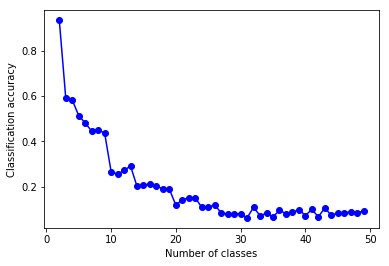

In [13]:
# number of classes vs classification accuracy
plt.figure()
plt.plot(ranges, outcome, 'bo', linestyle = '-')
plt.xlabel('Number of classes')
plt.ylabel('Classification accuracy')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/outcome_plot.pdf')
plt.show()

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


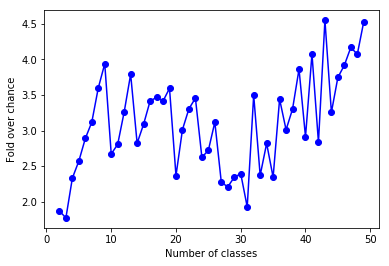

In [14]:
plt.figure()
print(ranges)
plt.plot(ranges, outcome*ranges, 'bo', linestyle = '-')
plt.xlabel('Number of classes')
plt.ylabel('Fold over chance')
# plt.annotate('125 classes', (125, 57.5), fontsize=12)
plt.savefig('/Users/ahyeon/Desktop/activ/bin/outcome_mean_plot.pdf')
plt.show()

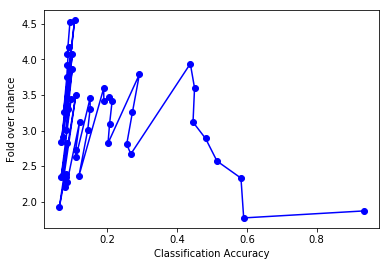

In [15]:
plt.figure()
plt.plot(outcome, outcome*ranges, 'bo', linestyle = '-')
plt.xlabel('Classification Accuracy')
plt.ylabel('Fold over chance')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/acc_vs_norm_acc.pdf')
plt.show()

In [16]:
filtered_outcome = np.load('outcome_cv_filtered_results.npz')

In [17]:
filtered_outcome = filtered_outcome['name1']

In [18]:
new_ranges = np.asarray(range(2,12))

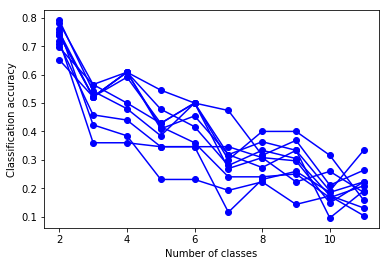

In [19]:
# number of classes vs classification accuracy (filtered)
plt.figure()
plt.plot(new_ranges, filtered_outcome, 'bo', linestyle = '-')
plt.xlabel('Number of classes')
plt.ylabel('Classification accuracy')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/outcome_filtered_plot.pdf')
plt.show()

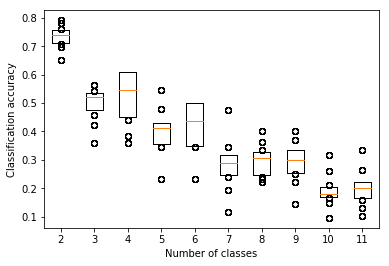

In [20]:
plt.figure()
for x in new_ranges:
    plt.boxplot(filtered_outcome.T, whis=[25,75], positions=new_ranges)
plt.xlabel('Number of classes')
plt.ylabel('Classification accuracy')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/outcome_filtered_boxplot.pdf')
plt.show()

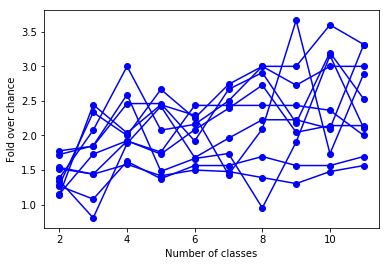

In [25]:
plt.figure()
plt.plot(new_ranges, filtered_outcome.T*new_ranges, 'bo', linestyle = '-')
plt.xlabel('Number of classes')
plt.ylabel('Fold over chance')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/outcome_filtered_mean_plot.pdf')
plt.show()

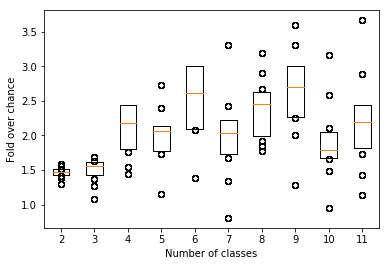

In [26]:
plt.figure()
for x in new_ranges:
    plt.boxplot(filtered_outcome.T*new_ranges, whis=[25,75], positions=new_ranges)
plt.xlabel('Number of classes')
plt.ylabel('Fold over chance')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/outcome_filtered_mean_boxplot.pdf')
plt.show()

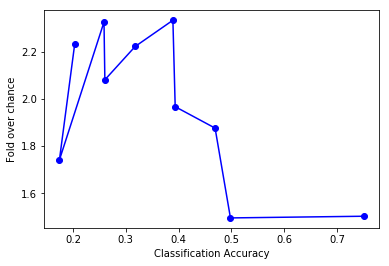

In [24]:
plt.figure()
plt.plot(filtered_outcome, filtered_outcome*new_ranges, 'bo', linestyle = '-')
plt.xlabel('Classification Accuracy')
plt.ylabel('Fold over chance')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/filtered_acc_vs_filtered_norm_acc.pdf')
plt.show()

In [ ]:
tree = hierarchy.linkage()

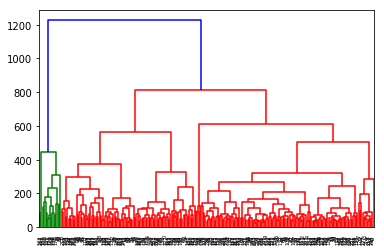

In [39]:
Z = hierarchy.linkage(data_oc.T, 'ward', optimal_ordering=True)
plt.figure()
hierarchy.dendrogram(Z)
plt.show()

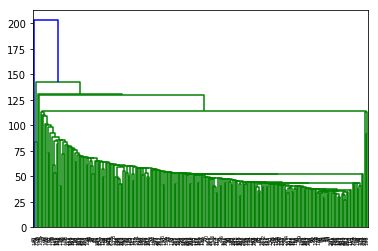

In [41]:
Z = hierarchy.linkage(data_oc.T, 'single', optimal_ordering=False)
plt.figure()
hierarchy.dendrogram(Z, )
plt.show()

In [43]:
# umap
umap(data_oc, n_neighbors=6)

TypeError: 'module' object is not callable